C:\Users\Rhayven\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Confusion Matrix:
[[159  15  61]
 [ 66  75  78]
 [ 51  26 520]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.58      0.68      0.62       235
     Neutral       0.65      0.34      0.45       219
    Positive       0.79      0.87      0.83       597

    accuracy                           0.72      1051
   macro avg       0.67      0.63      0.63      1051
weighted avg       0.71      0.72      0.70      1051

Overall Accuracy: 0.72


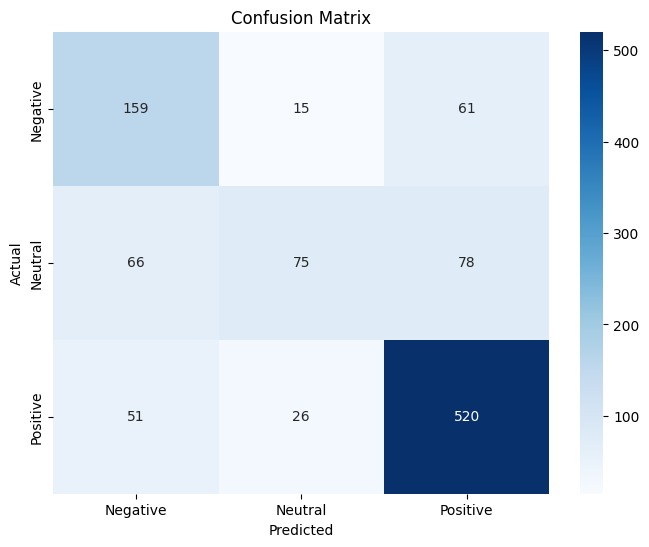

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Rhayven\Downloads\FB Risa Hontiveros_sentiment_improved.csv")

X = df['comment']
y = df['final_sentiment']

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
y_pred = cross_val_predict(rf_classifier, X_tfidf, y, cv=skf)

conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y, y_pred))

accuracy = accuracy_score(y, y_pred)
print(f"Overall Accuracy: {accuracy:.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
